In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv('/content/drive/MyDrive/dataset/sample dataset/cnn_model_input.csv')
df = df.drop(['Unnamed: 0'],axis=1)

# Extract features and labels
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
Y = df.iloc[:, -1].values   # Labels (the last column)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a deep neural network model
model = Sequential()

# Add input layer
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))  # Optional dropout for regularization

# Add hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=13, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Make predictions
y_pred = model.predict(X_test)

# You can use y_pred for further analysis or evaluation


Epoch 1/13
40/40 [==============================] - 3s 15ms/step - loss: 0.9491 - accuracy: 0.4797 - val_loss: 0.6922 - val_accuracy: 0.4563
Epoch 2/13
40/40 [==============================] - 0s 8ms/step - loss: 0.7039 - accuracy: 0.5445 - val_loss: 0.6859 - val_accuracy: 0.4375
Epoch 3/13
40/40 [==============================] - 0s 8ms/step - loss: 1.6626 - accuracy: 0.4914 - val_loss: 0.6856 - val_accuracy: 0.5719
Epoch 4/13
40/40 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5234 - val_loss: 0.6886 - val_accuracy: 0.5688
Epoch 5/13
40/40 [==============================] - 0s 9ms/step - loss: 0.6823 - accuracy: 0.5195 - val_loss: 0.6887 - val_accuracy: 0.4437
Epoch 6/13
40/40 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5367 - val_loss: 0.6857 - val_accuracy: 0.5688
Epoch 7/13
40/40 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.5445 - val_loss: 0.6791 - val_accuracy: 0.5656
Epoch 8/13
40/40 [=

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# Standardize the features (optional but recommended)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build a deep neural network model
model = Sequential()
# Add input layer
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# Add hidden layers
model.add(Dense(units=64, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# Add output layer
model.add(Dense(units=1, activation='sigmoid'))
# Compile the model with a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr / 2
    return lr
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)
# Train the model
history = model.fit(
    X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler_callback]
)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
# Make predictions
y_pred = model.predict(X_test)

Epoch 1/50
40/40 [==============================] - 4s 20ms/step - loss: 1.4319 - accuracy: 0.5437 - val_loss: 1.3465 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 2/50
40/40 [==============================] - 0s 12ms/step - loss: 1.1869 - accuracy: 0.5617 - val_loss: 1.1941 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 3/50
40/40 [==============================] - 0s 9ms/step - loss: 1.0381 - accuracy: 0.5609 - val_loss: 1.2473 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 4/50
40/40 [==============================] - 0s 10ms/step - loss: 0.9541 - accuracy: 0.5883 - val_loss: 1.0905 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 5/50
40/40 [==============================] - 0s 8ms/step - loss: 0.8912 - accuracy: 0.5703 - val_loss: 0.9044 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 6/50
40/40 [==============================] - 0s 10ms/step - loss: 0.8547 - accuracy: 0.5922 - val_loss: 0.9390 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 7/50
40/40 [==============================] - 0s 10ms/step - loss: 0.813

In [ ]:
# pip install scikitplot
print(fpr, tpr, thresholds)

[0.         0.00995025 0.00995025 0.01492537 0.01492537 0.0199005
 0.0199005  0.02487562 0.02487562 0.02985075 0.02985075 0.04477612
 0.04477612 0.1840796  0.1840796  0.31343284 0.31343284 0.39800995
 0.39800995 0.49253731 0.49253731 1.         1.        ] [0.         0.01005025 0.87939698 0.87939698 0.91959799 0.91959799
 0.95979899 0.95979899 0.96482412 0.96482412 0.96984925 0.96984925
 0.97487437 0.97487437 0.9798995  0.9798995  0.98492462 0.98492462
 0.98994975 0.98994975 0.99497487 0.99497487 1.        ] [2.0000000e+00 1.0000000e+00 7.4758440e-01 7.4632877e-01 6.5021908e-01
 6.1938322e-01 5.7298315e-01 5.7055378e-01 5.3486991e-01 5.3229457e-01
 5.3207386e-01 5.0363237e-01 4.9833217e-01 1.6428337e-01 1.5470356e-01
 4.8587624e-02 4.8092023e-02 2.1430820e-02 2.1201009e-02 1.1236161e-02
 1.0881030e-02 1.8977293e-10 0.0000000e+00]


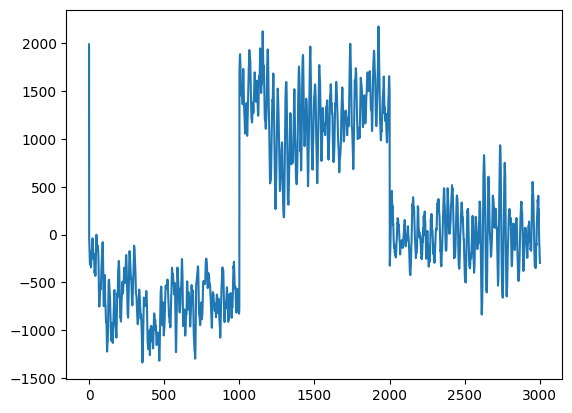

In [ ]:
# print(y_pred)
import matplotlib.pyplot as plt
plt.plot(X[-10])
plt.show()

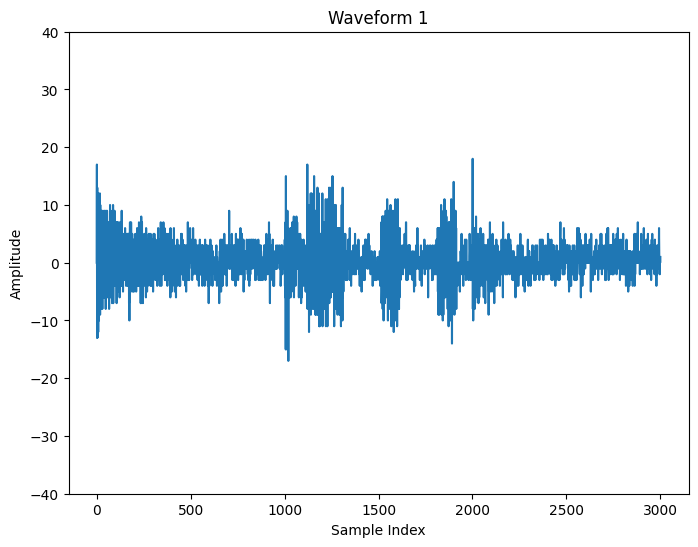

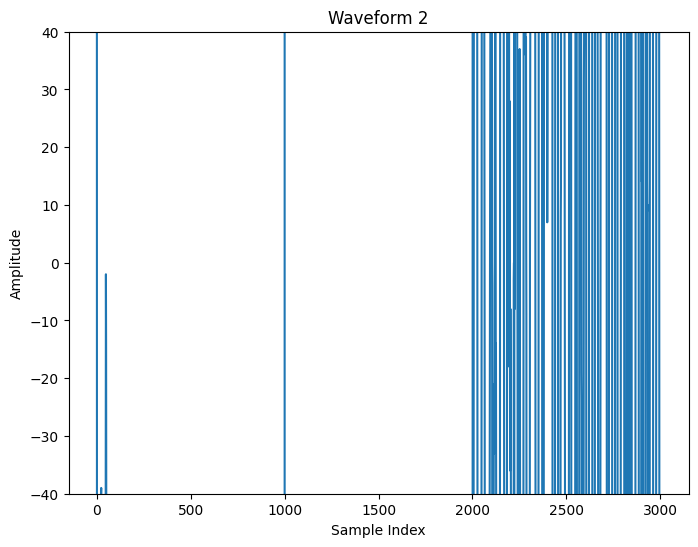

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
fig2, ax2 = plt.subplots(figsize=(8, 6))
y_min = -40
y_max = 40
# Plot the first set of data in the first figure
ax1.plot(X[0])
ax1.set_title('Waveform 1')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Amplitude')
ax1.set_ylim(y_min, y_max)  # Set the same y-axis limits for both plots
# Plot the second set of data in the second figure
ax2.plot(X[-10])
ax2.set_title('Waveform 2')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Amplitude')
ax2.set_ylim(y_min, y_max)  # Set the same y-axis limits for both plots
# Show both plots
plt.show()

In [ ]:
event_df = pd.read_csv("/content/drive/MyDrive/dataset/sample dataset/metadata_Instance_events_10k.csv")

In [ ]:
noise_df = pd.read_csv("/content/drive/MyDrive/dataset/sample dataset/metadata_Instance_noise_1k.csv")

In [ ]:
event_df = event_df[:1000]

In [ ]:
event_df.groupby("station_channels")['station_channels'].count()

station_channels
EH    283
HH    323
HL      3
HN    391
Name: station_channels, dtype: int64

In [ ]:
noise_df.groupby("station_channels")['station_channels'].count()

station_channels
EH    195
EN      1
HH    501
HL      4
HN    299
Name: station_channels, dtype: int64

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/sample dataset/cnn_model_input.csv')
# Extract features and labels
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
Y = df.iloc[:, -1].values   # Labels (the last column)


In [ ]:
from sklearn.utils import shuffle


# Assuming you have X (waveform data) and y (category labels)
X_shuffled, y_shuffled = shuffle(X, Y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X contains your waveform data and y contains category labels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [ ]:
event_df[['source_origin_time','trace_start_time']].iloc[0]

source_origin_time    2016-12-04T15:34:52.05Z
trace_start_time      2016-12-04T15:34:43.92Z
Name: 0, dtype: object

In [ ]:
event_df[-2:]['trace_name']

998    11052061.IV.T1256..HN
999     11052061.IV.TERO..HH
Name: trace_name, dtype: object

In [ ]:
noise_df[-2:]

,source_id,station_network_code,station_code,station_location_code,station_channels,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,station_vs_30_detail,...,trace_Z_upper_quartile_counts,trace_E_spikes,trace_N_spikes,trace_Z_spikes,trace_name,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number
998,20170507T122954,IV,T1216,NaN,EH,42.890667,13.01900,620.0,547.0,Vs30 extracted from ShakeMap,...,3.0,0.0,0.0,0.0,20170507T122954.IV.T1216..EH,1,4,0.0,0.0,0.0
999,20190813T130147,IV,CESX,NaN,HH,42.608486,12.58676,380.0,669.0,Vs30 extracted from ShakeMap,...,16.0,0.0,0.0,0.0,20190813T130147.IV.CESX..HH,0,0,0.0,0.0,0.0


In [ ]:
import h5py
filename = "/content/drive/MyDrive/dataset/sample dataset/Instance_events_counts_10k.hdf5"
file = h5py.File(filename,"r")
data = file["data"]
dataset = data['11052061.IV.TERO..HH']

12000

In [ ]:
dataset[:,:1000].reshape(-1).shape

(3000,)

In [ ]:
event_data_point_1 = np.array(dataset)[:,:1000].reshape(-1)

In [ ]:
X_test[0].shape

(3001,)

In [ ]:
event_data_point_1.shape

(3003,)

In [ ]:
y_pred = model.predict(event_data_point_1)

ValueError: ignored